## Import Data from Sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris() 
X = iris.data 
target = iris.target 
names = iris.target_names

#print('The data matrix:\n',iris['data'])
#print('The classification target:\n',iris['target'])
print('The names of the dataset columns:\n',iris['feature_names'])
print('The names of target classes:\n',iris['target_names'])
#print('The full description of the dataset:\n',iris['DESCR'])
#print('The path to the location of the data:\n',iris['filename'])

The names of the dataset columns:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The names of target classes:
 ['setosa' 'versicolor' 'virginica']


# 1. Graphical exploratory data analysis
## Preparing the data

In [2]:
# create index for the DataFrame
species=[]
for item in iris.target:
    if item == 0:
        species.append('setosa')
    elif item ==1:
        species.append('versicolor')
    else:
        species.append('virginica')

In [3]:
# Create a DataFrame from Iris Data
data = pd.DataFrame(iris.data,columns=iris['feature_names'])
data['species']=species
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Data used in the course
versicolor_petal_length = data.loc[data.species=="versicolor","petal length (cm)"]
setosa_petal_length=data.loc[data.species=="setosa","petal length (cm)"]
virginica_petal_length=data.loc[data.species=="virginica","petal length (cm)"]
versicolor_petal_width = data.loc[data.species=="versicolor","petal width (cm)"]
print(versicolor_petal_length.head())

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64


### Plotting a histogram of iris data

In [5]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

<Figure size 640x480 with 1 Axes>

## Adjusting the number of bins in a histogram

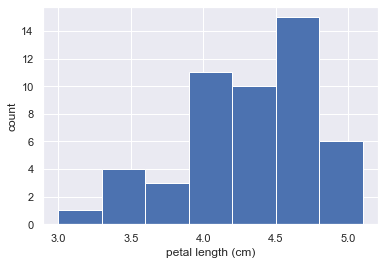

In [6]:
# Compute number of data points: n_data
n_data=len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins= int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length,bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

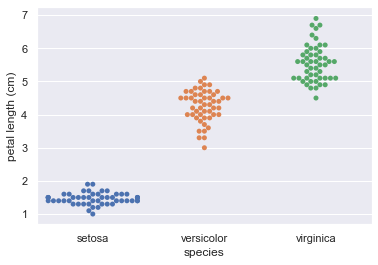

In [7]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)',data = data)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')
# Show the plot
plt.show()


## Computing the ECDF

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


## Plotting the ECDF

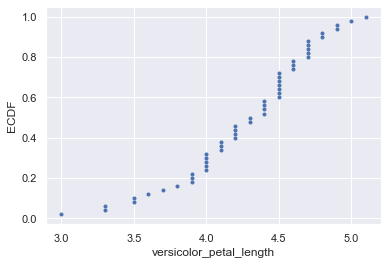

In [9]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers,y_vers,marker ='.',linestyle='none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('ECDF')


# Display the plot

plt.show()

## Comparison of ECDFs


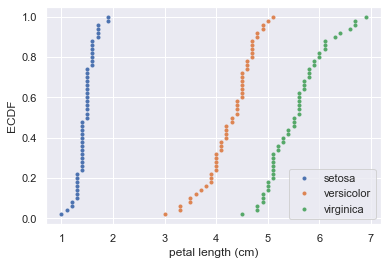

In [10]:
# Compute ECDFs
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot

_ = plt.plot(x_set, y_set,marker='.',linestyle = 'none')
_ = plt.plot(x_vers, y_vers,marker='.',linestyle = 'none')
_ = plt.plot(x_virg, y_virg,marker='.',linestyle = 'none')
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# 2. Quantitative exploratory data analysis

## Computing means

In [11]:
# Compute the mean: mean_length_vers
mean_length_vers = versicolor_petal_length.mean()

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Computing percentiles

In [12]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## Comparing percentiles to ECDF

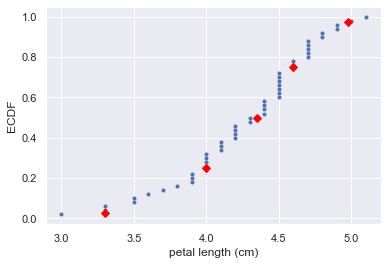

In [13]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


## Box-and-whisker plot

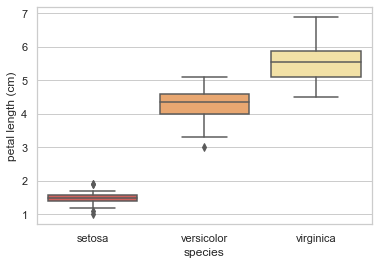

In [14]:
# Create box plot with Seaborn's default settings
sns.set_style("whitegrid")
sns.set_palette("Spectral")
sns.boxplot(data=data,x='species',y='petal length (cm)')

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')


# Show the plot
plt.show()


## Computing the variance


In [15]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


## The standard deviation and the variance


In [16]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(versicolor_petal_length.std())

0.4651881339845204
0.46991097723995806


## Scatter plots

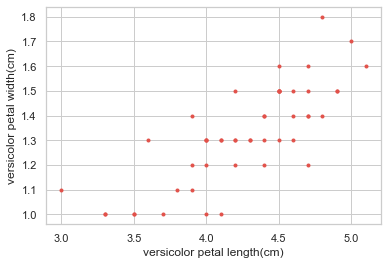

In [17]:
# Make a scatter plot
plt.plot(versicolor_petal_length,versicolor_petal_width,marker='.',linestyle='none')


# Label the axes
plt.xlabel('versicolor petal length(cm)')
plt.ylabel('versicolor petal width(cm)')

# Show the result
plt.show()

## Computing the covariance


In [18]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


## Computing the Pearson correlation coefficient


In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## Generating random numbers using the np.random module

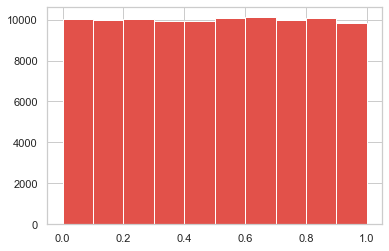

In [20]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers =np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] =  np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


## The np.random module and Bernoulli trials

In [21]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

## How many defaults might we expect?

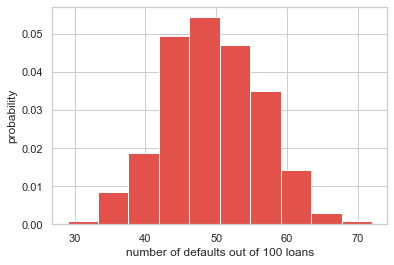

In [22]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(1000,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

## Will the bank fail?

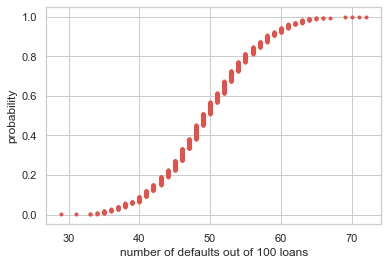

Probability of losing money = 1.0


In [23]:
# Compute ECDF: x, y
x, y  = ecdf(n_defaults)

# Plot the ECDF with labeled axes

_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

## Sampling out of the Binomial distribution


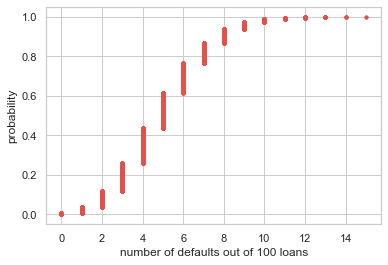

In [24]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100,p=0.05,size=10000)

# Compute CDF: x, y
x,y  = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker = '.',linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')



# Show the plot
plt.show()


## Plotting the Binomial PMF


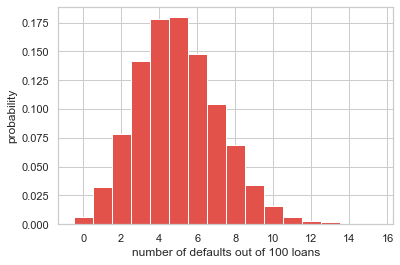

In [25]:
# Compute bin edges: bins
bins = np.arange(0, 2 + max(n_defaults)) - 0.5

# Generate histogram
_ = plt.hist(n_defaults,density=True,bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')


# Show the plot
plt.show()

## Relationship between Binomial and Poisson distributions

In [26]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size = 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000] 
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n=n[i],p=p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9622 3.144005591598081
n = 20 Binom: 9.972 2.2666750980235344
n = 100 Binom: 10.0142 2.9757013223776343
n = 1000 Binom: 10.0127 3.166913120058711


## The Normal PDF

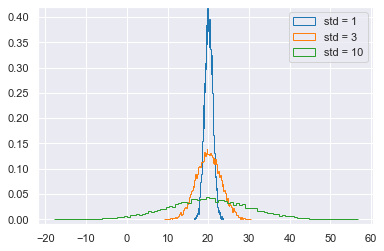

In [27]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
sns.set_style("darkgrid")
sns.set_palette("tab10")
samples_std1 = np.random.normal (20,1,10000)
samples_std3 = np.random.normal (20,3,10000)
samples_std10= np.random.normal (20,10,10000)
# Make histograms

plt.hist(samples_std1,density=True,histtype='step',bins=100)
plt.hist(samples_std3,density=True,histtype='step',bins=100)
plt.hist(samples_std10,density=True,histtype='step',bins=100)


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


## The Normal CDF

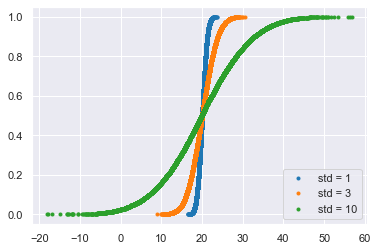

In [28]:
# Generate CDFs

x_std1, y_std1  =ecdf(samples_std1)
x_std3, y_std3  =ecdf(samples_std3)
x_std10, y_std10=ecdf(samples_std10)

# Plot CDFs

plt.plot(x_std1, y_std1,marker='.',linestyle = 'none')
plt.plot(x_std3, y_std3,marker='.',linestyle = 'none')
plt.plot(x_std10, y_std10,marker='.',linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


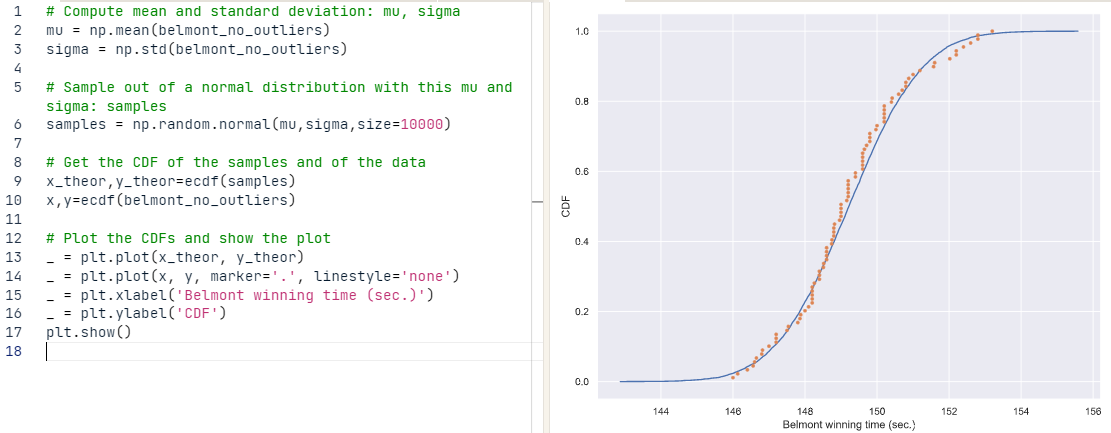